In [17]:
import math
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

# Session 1

## Introduction to X-ray attenuation and its implementation in gVXR

## Authors: Franck Vidal and Jean-Michel L&eacute;tang

# Aims

- Introduce what X-rays are and how they are produced;
- Understand how X-rays interact with matter;
- Use the Beer-Lambert law to compute the attenuation of X-ray by matter;


- Check that gVirtualXray is installed
- Check the GPU implementation (software and hardware)
- How to get help

<!-- # Check that gVirtualXray is installed

The wrapper for Python 3 is called "gvxrPython3". 
Where does the "3" come from? 
This is because few years ago there was also "gvxrPython2" for Python 2 but Python 2 is now deprecated, so is gvxrPython2. 
gvxrPython3 is a bit long, gvxr is defined as an alias as follows: -->

# What X-rays are?

Write slide

# Rational for this Research

- Simulation of X-Ray attenuation extensively studied in physics;
- Different physically-based simulation code available;
- Physically-based simulation usually performed using Monte Carlo methods on CPU (often used in dosimetry for radiotherapy);
    - Very accurate; but
    - Computing an image requires a very very very long time (e.g. days or weeks);
- Ray-tracing is an alternative, but
    - Still relatively slow on CPU;
    - Does not easily take into account scattering;
        - Scattering does not necessarily matter in X-ray transmission imaging;
    - Does not include Poisson counting noise;
        - Poisson noise can be added as a post-process.


# Medical Training using VR

- PhD (start 2003) and Postdoc (start 2006) in medical VR;
- Development of VR apps to train Interventional radiologists;
    - Stick needles and catheters in the human body whilst looking at images
    - Such as fluoroscopy;
    - Real-time X-ray images on a TV screen.
- Not interested in scattering;
- Noise is not an issue;
- Ray-tracing is viable in this context.


# Need for a Simulation Library that is

- Open-source (with a flexible license)
    - Can be used in open-source projects
    - Can be used in closed source commercial applications too
- Fast
    - GPU implementation.
- Flexible
    - Available for most popular programming languages
- Cross platform
    - Run on GNU/Linux, Mac OS X and Windows
- Validated


# In a nutshell, gVirtualXray is

- a C++ X-Ray simulation library
- Open source;
- Realtime;
- Portable;
- Validated;
- Available for many programming languages.

# Fact sheet

- SVN repository hosted by [![Sourceforge](img/sourceforge-logo.png)](https://sourceforge.net/)
- Implemented in ![C++](img/cpp-logo.png) using ![OpenGL](img/OpenGL-logo.png)
<!-- - Can also be deployed in ![Python](img/python-logo.png) applications; -->
- Cross-platform, the library works on
    - Windows, GNU/Linux, and Mac OS X,
    - Nvidia and AMD graphics cards,
    - Integrated GPUs,
    - Desktop PCs and Laptops.
<!-- - Provides real-time performance; -->
- Is accurate (quantitative validation);
- Enable reproducible research;
- Supports [![XCOM](img/XCOM-logo.jpg): Photon Cross Sections Database](https://physics.nist.gov/PhysRefData/Xcom/html/xcom1.html) from [![NIST](img/nist-logo.png)](https://www.nist.gov/);
- Uses polygon meshes to model 3-D geometries from popular file formats (eg. STL, PLY, 3DS, OBJ, DXF, X3D, DAE)

![Example of wireframe model](img/wireframe_model2.png)


# Simulation supports:

- Various source shapes
    - Point source;
    - Cube source;
    - Parallel beam.
- Incident beams:        
    - Monochromatic;
    - Polychromatic.
- Geometries:
    - Surface meshes (triangles);
    - Volume meshes (tetrahedrons). **NEW**
- Material properties:
    - Chemical elements (e.g. W for tungsten);
    - Compounds (e.g. H2O for water); **NEW**
    - Mixture (e.g. Ti90/Al6/V4); **NEW**
    - Hounsfield units (for medical applications).

# More recently

- Improved installation from source code.
- Converter from Abaqus files 2 STL files: **NEW**
    - The simulation works with volumetric meshes (tetrahedrons),
    - With surface meshes (triangles)
- Always working on improvements (when time allows)
    - Currently working on the deployment on SuperComputing Wales. **work-in-progress**
    - Port to Vulkan? **work-in-progress**
    - Maybe one day, a Matlab wrapper?

# Applications of gVirtualXRay

- [Teaching particle physics to undergraduates](https://doi.org/10.1088/1361-6404/ab5011);
- Virtual Reality Simulation;
- [Virtual Testing Lab](https://doi.org/10.5281/zenodo.1452506)
- [Design new clinical imaging modality to reduce dose exposure](https://doi.org/10.1109/ACCESS.2019.2895925)
- [Teaching radiography in medicine](https://doi.org/10.2312/cgvc.20191267)

![GUI of radiography tool](img/suiteacher.png)

# Interaction of X-rays with matter

# X-photons/matter Interactions (1/2)

- X-photons cross matter;
- During their path into any material, they can interact with matter.

![*Illustration of X-ray photon/matter interaction*](img/interactions.png)

1. Directly transmitted photons (no interaction);
2. Absorbed photons;
3. Scattered photons;
4. Absorbed scattered photons.

# X-photons/matter Interactions (2/2)

**For most X-rays imaging modalities, only directly transmitted photons are essential:**

- Scattered photons decrease the image quality;
- Absorbed photons do not reach the detector;
- Scattered photons may be ignored (but not necessarily).

![*Illustration of X-ray photon/matter interaction*](img/interactions.png)

1. Directly transmitted photons (no interaction);
2. Absorbed photons;
3. Scattered photons;
4. Absorbed scattered photons.


# Beer-Lambert Law (Attenuation Law)


![*Illustration of the Beer-Lambert law*](img/attenuation.png)

- N<sub>out</sub>(E) = N<sub>in</sub>(E) e<sup>(-&Sigma;<sub>i</sub> &mu;<sub>i</sub>(E,&rho;,Z) L<sub>p</sub>(i))</sup>
  - N<sub>in</sub>(E) the number of incident photons at energy E;
  - N<sub>out</sub>(E) the number of transmitted photons of energy E;
  - &mu;<sub>i</sub> the linear attenuation coefficient (in cm<sup>-1</sup>) of the i<sup>th</sup> object. It depends on:
    - E the energy of incident photons;
    - &rho; the material density of the object;
    - Z the atomic number of the object material.
  - L<sub>p</sub>(i) the path length of the ray in the i<sup>th</sup> object.
- E<sub>out</sub> = N<sub>out</sub>(E) x E
  - E<sub>out</sub> the energy received by the pixel, i.e. as recorded in the X-ray image.

# Example (monochromatic case)

See [http://gvirtualxray.sourceforge.net/validation/validation_03/beer_lambert_law_monochromatic.php](http://gvirtualxray.sourceforge.net/validation/validation_03/beer_lambert_law_monochromatic.php)

# Linear attenuation coefficient

The linear [attenuation coefficient](https://www.creatis.insa-lyon.fr/~letang/x-ray-book/physics.html#attenuation-coefficient) $\mu$ appears in the Beer-Lambert [Attenuation law](https://www.creatis.insa-lyon.fr/~letang/x-ray-book/physics.html#attenuation-law) which gives the number of directly transmitted photons $N$ (i.e. without interaction) in terms of the number of incident photons $N_0$:
$$
N_{\mathrm{dt}}(E)=N_0(E)\exp(-\mu(E)X)
$$
where $X$ is the thickness of the traversed material. This expression is only valid for photons which have the same energy $E$.

In [1]:
%matplotlib widget
import utilities
import ipywidgets as widgets
widgets.interact_manual(utilities.mu,material=widgets.Dropdown(options=[('Polyethylene','H2C'),('Water','H2O'),('Aluminium','Al'),('Copper','Cu'),('Yttrium','Y'),('Tin','Sn'),('Lead','Pb')],value="H2C",layout={'width': 'max-content'},description='Material:',style={'description_width': 'initial'}));

interactive(children=(Dropdown(description='Material:', layout=Layout(width='max-content'), options=(('Polyeth…

# Attenuation of 500 photons of 100 keV by 1cm of copper

In the previous cell, 
1. Select copper as material
2. Click on `Run Interact`
3. Using the mouse cursor, find what the total linear attenuation coefficient  of copper is for 100 keV,
4. Write down the value
5. In the cell below, compute $$N_{\mathrm{dt}}(E)=N_0(E)\exp(-\mu(E)X)$$
    - with $E$ = 100 keV,
    - $N_0(E)$ = 500
    - $X$ = 1 and
    - $\mu(E)$ the value you wrote down

In [66]:
N_0 = 500
X_Cu = 1
mu_Cu = 4.07937

N_dt = N_0 * math.exp(-mu_Cu * X_Cu)
print("Out of", N_0, "photons, only", round(N_dt), "are transmitted")

Out of 500 photons, only 8 are transmitted


# Attenuation of 500 photons of 100 keV by ??cm of water

- We know that $$N_{\mathrm{Cu}}=500 \times \exp(-\mu_{Cu} \times 1) = 8$$
- We want to illustrate than water does not attenuate X-rays of 100 keV as much as copper.
- Repeat some of the previous steps to find the what the total linear attenuation coefficient of water is for 100 keV.
- The Beer-Lambert law in this case is:
$$N_{\mathrm{H_2O}}= 500 \times \exp(-\mu_{H_2O} \times x) = 8$$
- What is the value of $x$?

In [67]:
X_H2O = None
mu_H2O = 0.170749

$$500 \times \exp(-\mu_{H_2O} \times x) = N_{\mathrm{H_2O}} = 8$$
$$\exp(-\mu_{H_2O} \times x) = \frac{N_{\mathrm{H_2O}}}{500}$$
$$-\mu_{H_2O} \times x = \ln\left(\frac{N_{\mathrm{H_2O}}}{500}\right)$$
$$\mu_{H_2O} \times x = -\ln\left(\frac{N_{\mathrm{H_2O}}}{500}\right)$$
$$x = \frac{-\ln\left(\frac{N_{\mathrm{H_2O}}}{500}\right)}{\mu_{H_2O}}$$

In [68]:
X_H2O = (-math.log(N_dt / 500)) / mu_H2O
print(round(X_H2O), "cm of water is needed to stop as many photons of 100 keV as", X_Cu,"cm of copper")

24 cm of water is needed to stop as many photons of 100 keV as 1 cm of copper


# Check if we made a mistake

In [69]:
N_dt = N_0 * math.exp(-mu_H2O * X_H2O)
print("Out of", N_0, "photons, only", round(N_dt), "are transmitted")

Out of 500 photons, only 8 are transmitted


- Write down the values of `X_Cu` and `X_H2O`
- We will double-check again with gVXR.

In [70]:
# Import gVXR package
from gvxrPython3 import gvxr

In [7]:
# Create an OpenGL context
print("Create an OpenGL context")
gvxr.createWindow();
gvxr.setWindowSize(512, 512);

Create an OpenGL context


0

NVIDIA Corporation
NVIDIA GeForce RTX 2080 Ti/PCIe/SSE2
3.2.0 NVIDIA 515.48.07



In [26]:
# Set up the beam
print("Set up the beam")
gvxr.setSourcePosition(-150.0,  0.0, 0.0, "cm");
gvxr.usePointSource();
#gvxr.useParallelBeam();

# 500 phothons of 100 keV per ray
gvxr.setMonoChromatic(100, "keV", 500);

Set up the beam


In [29]:
# Set up the detector
print("Set up the detector");
gvxr.setDetectorPosition(30.0, 0.0, 0.0, "cm");
gvxr.setDetectorUpVector(0, 0, -1);
gvxr.setDetectorNumberOfPixels(320, 320);
gvxr.setDetectorPixelSize(1.5, 1.5, "mm");

Set up the detector


In [71]:
# Create the copper cube
print("Create the samples");
gvxr.removePolygonMeshesFromSceneGraph()
gvxr.makeCube("copper", X_Cu, "cm");

print("Set the material properties");
gvxr.setElement("copper", "Cu");

Create the samples
Set the material properties


In [72]:
# Compute an X-ray image
print("Compute an X-ray image of copper");
gvxr.removePolygonMeshesFromXRayRenderer();
gvxr.addPolygonMeshAsInnerSurface("copper");

# # Get the image (energy fluence)
# x_ray_image_copper = np.array(gvxr.computeXRayImage());

# # Convert the image from MeV into keV
# x_ray_image_copper /= gvxr.getUnitOfEnergy("MeV")

# # Get the number of photons rather than the energy fluence
# x_ray_image_copper /= 100 * gvxr.getUnitOfEnergy("keV")

# Get the image (number of photons)
x_ray_image_copper = np.array(gvxr.computeXRayImage(False));

Compute an X-ray image of copper


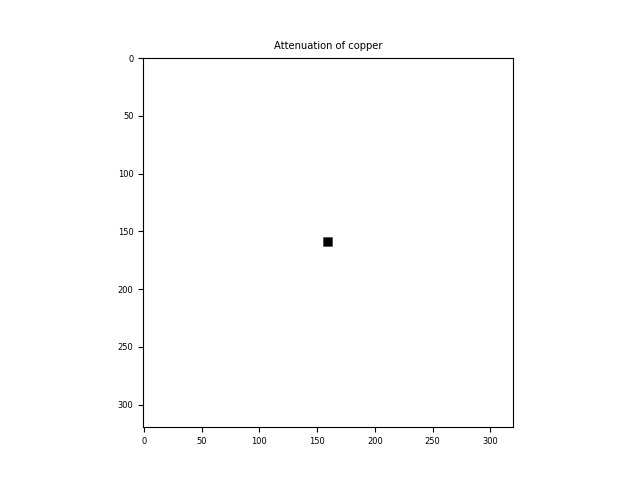

In [77]:
%matplotlib widget

plt.figure()
plt.title("Attenuation of copper")
plt.imshow(x_ray_image_copper, cmap="gray")

In [74]:
# Create the water cube
print("Create the samples");
gvxr.makeCube("water", X_H2O, "cm");

print("Set the material properties");
gvxr.setCompound("water", "H2O");
gvxr.setDensity("water", 1, "g.cm-3");

Create the samples
Set the material properties


In [75]:
# Compute an X-ray image
print("Compute an X-ray image of water");
gvxr.removePolygonMeshesFromXRayRenderer();
gvxr.addPolygonMeshAsInnerSurface("water");

# # Get the image (energy fluence)
# x_ray_image_copper = np.array(gvxr.computeXRayImage());

# # Convert the image from MeV into keV
# x_ray_image_copper /= gvxr.getUnitOfEnergy("MeV")

# # Get the number of photons rather than the energy fluence
# x_ray_image_copper /= 100 * gvxr.getUnitOfEnergy("keV")

# Get the image (number of photons)
x_ray_image_water = np.array(gvxr.computeXRayImage(False));

Compute an X-ray image of water


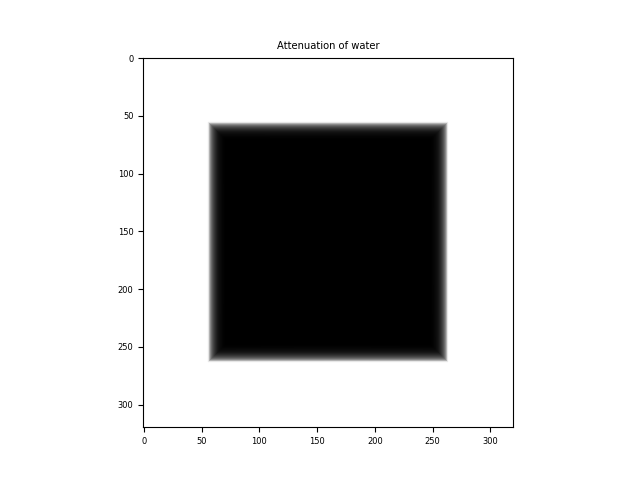

In [76]:
%matplotlib widget


plt.figure()
plt.title("Attenuation of water")
plt.imshow(x_ray_image_water, cmap="gray")

In [78]:
# Display the 3D scene (no event loop)
gvxr.displayScene();

# Display the 3D scene (no event loop)
# Run an interactive loop
# (can rotate the 3D scene and zoom-in)
# Keys are:
# Q/Escape: to quit the event loop (does not close the window)
# B: display/hide the X-ray beam
# W: display the polygon meshes in solid or wireframe
# N: display the X-ray image in negative or positive
# H: display/hide the X-ray detector
gvxr.renderLoop();

# How are X-rays produced?

Write slides

# X-ray spectrum

The simulation software below makes it possible to calculate spectra as generated by the [X-ray generators](https://www.creatis.insa-lyon.fr/~letang/x-ray-book/instrumentation.html#x-ray-production) by specifying:
- the high voltage U of electrons acceleration,
- the thickness and the nature of the plate inserted.

Certain quantities associated with the spectra are calculated at output in particular
- the average energy of the photons of the spectrum,
- the half-value layer (in mm of Al).

In [79]:
%matplotlib widget
import ipywidgets as widgets
import utilities
widgets.interact_manual(utilities.spectrum,E0=widgets.IntText(value=100,step=1,description="High voltage (kV):",disabled=False,style={'description_width': 'initial'}),Mat_Z=widgets.Dropdown(options=[('Water',-1),('Aluminium',13),('Copper',29),('Lead',82)],value=-1,layout={'width': 'max-content'},description='Material:',style={'description_width': 'initial'}),Mat_X=widgets.FloatText(value=0.,step=0.01,description="Thickness (mm):",disabled=False,style={'description_width': 'initial'}));

interactive(children=(IntText(value=100, description='High voltage (kV):', style=DescriptionStyle(description_…

# Beer-Lambert Law in the polychromatic case

- There are more than one energy in the incident beam spectrum
- Just iterate over the energy channels:

E<sub>out</sub> = &Sigma;<sub>j</sub> E<sub>j</sub> x N<sub>out</sub>(E<sub>j</sub>)

E<sub>out</sub> = &Sigma;<sub>j</sub> E<sub>j</sub> x N<sub>in</sub>(E<sub>j</sub>) e<sup>(-&Sigma;<sub>i</sub> &mu;<sub>i</sub>(E<sub>j</sub>,&rho;,Z) L<sub>p</sub>(i))</sup>

with j the j-th energy channel


# Example (polychromatic case)

See [http://gvirtualxray.sourceforge.net/validation/validation_05/beer_lambert_law_polychromatic.php](http://gvirtualxray.sourceforge.net/validation/validation_05/beer_lambert_law_polychromatic.php)

# Path Length: Naive Approach

![*Is finding intersections in the right order important?*](img/intersections.png)

1. Detect every intersection between a ray and the objects;
2. Sort intersection
(Can be handled by GPUs using depth-peeling, a multi-pass rendering technique for semi-transparent polygonal objects without sorting polygons);
3. Compute path length.


# Path Length: L-Buffer

![*Finding intersections in any order does not matter*](img/l-buffer.png)

**Intersection sorting is actually not needed!**

- By convention normals are outward;
- A ray penetrates into an object when the dot product between the view vector (V) and the normal (N<sub>i</sub>) at the intersection point is positive;
- It leaves an object when the dot product is negative.

# L-Buffer Implementation

L<sub>p</sub>=&Sigma;<sub>i</sub> - sng(V &middot; N<sub>i</sub>) x d<sub>i</sub>


- i refers to i<sup>th</sup> intersection in an arbitrary order;
- d<sub>i</sub> distance from X-ray source to intersection point;
- sgn(V &middot; N<sub>i</sub>) stands for the sign of the dot product between V and N<sub>i</sub>;
- In a shader program, compute:
    - sgn(V &middot; N<sub>i</sub>);
    - d<sub>i</sub> the distance between the X-ray source and the intersection;
    - Assign -sng(V &middot; N<sub>i</sub>) x d<sub>i</sub> as the fragment value.
- For each pixel, compute L<sub>p</sub> thanks to high-dynamic range and OpenGL blending function (pixel values may not be between 0 and 1).

*See [http://dx.doi.org/10.2312/LocalChapterEvents/TPCG/TPCG09/025-032](DOI: 10.2312/LocalChapterEvents/TPCG/TPCG09/025-032) for more details.*


# Multipass Rendering Pipeline

pixel = E x N<sub>out</sub>

pixel =  <span style="color:green">E x N<sub>in</sub>(E) e</span><sup>(<span style="color:red">-&Sigma;<sub>i</sub> &mu;<sub>i</sub> </span> <span style="color:blue">  L<sub>p</sub>(i)</span>)</sup>

- Needs 3 FBOs with high-dynamic range capability for off-line rendering:

- For each object of the scene:
  1. Compute L<sub>p</sub>(i);
  2. Update results of &Sigma; &mu;<sub>i</sub> L<sub>p</sub>(i).
- For the final image only:
  1. Compute N<sub>out</sub>;
  2. (Optional when direct display only is needed).

![*OpenGL pipeline to compute the Beer-Lambert law (monochromatic case).*](img/pipeline1.png)

# Adding the Beam Spectrum

- Take into the different energies within the incident beam;
- This is known as *beam hardening*;
- Iterate over several energy channels:
  - pixel = &Sigma;<sub>j</sub> E<sub>j</sub> x N<sub>out</sub>(E<sub>j</sub>)
  - pixel = &Sigma;<sub>j</sub> E<sub>j</sub> x N<sub>in</sub>(E<sub>j</sub>) e<sup>(-&Sigma;<sub>i</sub> &mu;<sub>i</sub>(E<sub>j</sub>,&rho;,Z) d<sub>i</sub>)</sup>

- Example:

![*Simulation parameters*](img/figure3a.png)

![*Polychromatic beam spectrum for 90kV X-ray tube peak voltage*](img/figure3b.png)

![*Intensity profiles, see dash line in image above*](img/figure3c.png)


# Simulation with Different Source Shapes

- Take into account the focal spot of the X-ray source;
- Iterate over several point sources within the volume of the focal spot:
  - pixel = &Sigma;<sub>k</sub> &Sigma;<sub>j</sub> E<sub>j</sub> x N<sub>in</sub>(E<sub>j</sub>) e<sup>(-&Sigma;<sub>i</sub> &mu;<sub>i</sub>(E<sub>j</sub>,&rho;,Z) d<sub>i</sub>(k))</sup>
  - See blur in the corresponding image below.


| Parallel beam             |  Infinitely small point source | 1<sup>3</sup>mm source |
:-------------------------:|:-------------------------:|:-------------------------:
![](img/figure2a_top.png) |   ![](img/figure2b_top.png)  |   ![](img/figure2c_top.png)
![](img/figure2a_bottom.png) | ![](img/figure2b_bottom.png)| ![](img/figure2c_bottom.png)




# Final Simulation Flowchart

- Iterate over several energy channels: Three extra for loops;
- Iterate over several point sources within the volume of the focal spot: One extra for loop.

![*Final OpenGL pipeline*](img/figure4.png)

# Bibliography (links)

- [DOI: 10.2312/LocalChapterEvents/TPCG/TPCG09/025-032](http://dx.doi.org/10.2312/LocalChapterEvents/TPCG/TPCG09/025-032)
- [DOI: 10.1007/s11548-009-0367-1](http://dx.doi.org/10.1007/s11548-009-0367-1)
- [DOI: 10.2312/egp.20101026](http://dx.doi.org/10.2312/egp.20101026)
- [DOI: 10.1016/j.compmedimag.2015.12.002](https://doi.org/10.1016/j.compmedimag.2015.12.002)


# Quantitative Validation

- Simulating an image relies on a Beer-Lambert law implementation;
- Solving the Beer-Lambert law relies on Linear Attenuation Coefficients; (&mu;)
- &mu; is not known for given incident energies;
- &mu; is computed using Mass Attenuation Coefficients (&mu;/&rho;) and material density (&rho;).
- **Are the values used in gVirtualXRay accurate?**
    - Compare values computed in gVirtualXRay with those from the literature.
- **Are the Beer-Lambert law implementations accurate?**
    - Compare values computed in gVirtualXRay with theoretical ones.
- **Are the simulated images accurate?**
    - Compare images computed using gVirtualXRay with those using a state-of-the-art Monte Carlo software, e.g.

    [![Geant4](img/g4logo-web.png)](https://geant4.web.cern.ch/)


# Density for Different Materials (human tissues) from the Literature
![*Image from  W. Schneider, T. Bortfeld, and W. Schlegel, “Correlation between CT numbers and tissue parameters needed for Monte Carlo simulations of clinical dose distributions,” Physics in Medicine & Biology, vol. 45, no. 2, p. 459, 2000. doi:[10.1088/0031-9155/45/2/314](http://doi.org/10.1088/0031-9155/45/2/314)*](img/rho_reference.png)

# Density for Different Materials (human tissues) computed by gVirtualXRay

![*Image from [http://gvirtualxray.sourceforge.net/validation/validation_02/density.php](http://gvirtualxray.sourceforge.net/validation/validation_02/density.php)*](img/figure5b.png)





# Mass Attenuation Coefficients

- Any tissue can be described by its Hounsfiled Unit (HU):
  - HU(material) = 1000 x (&mu;(material) - &mu;(water)) / &mu;(water)
- Given a HU value for any simulated object;
  - If &mu;(water) is known for any energy,
  - then &mu;(material) for any HU and for any energy can be computed:
    - &mu;(material, E) = &mu;(water, E) x (1 + HU(material)/1000)
- 	Mass attenuation coefficients (&mu;/&rho;) for various human tissues can be found in the literature;
- 	The density (&rho;) for various human tissues can be found in the literature.
- **Linear attenuation coefficients can therefore be computed for various human tissues** and
- **used to solve the Beer-Lambert law**

# Mass Attenuation Coefficients: Tissue, Soft (ICRU-44)

- ![*Image from [https://physics.nist.gov/PhysRefData/XrayMassCoef/ComTab/tissue.html](https://physics.nist.gov/PhysRefData/XrayMassCoef/ComTab/tissue.html)*](img/tissue.png)

- &mu;(water) from literature is provided at given energies only: Interpolation needed for missing energies

  - ![*Image computed with gVirtualXRay using linear interpolation*](img/test_soft_tissue_1.png)

  - ![*Image computed with gVirtualXRay using interpolation in the log scale*](img/test_soft_tissue_2.png)


# Mass Attenuation Coefficients: Bone, Cortical (ICRU-44)

- ![*Image from [https://physics.nist.gov/PhysRefData/XrayMassCoef/ComTab/bone.html](https://physics.nist.gov/PhysRefData/XrayMassCoef/ComTab/bone.html)*](img/bone.png)

- &mu;(water) from literature is provided at given energies only: Interpolation needed for missing energies

  - ![*Image computed with gVirtualXRay using linear interpolation*](img/test_bone_1.png)

  - ![*Image computed with gVirtualXRay using interpolation in the log scale*](img/test_bone_2.png)

**Not a good match as the peaks are not visible in &mu;(water)**

- ![*Image computed with gVirtualXRay using NIST's XCOM database*](img/test_bone_3.png)

**This is now a good match**


# Going back to previous slide

- Simulating an image relies on a Beer-Lambert law implementation;
- Solving the Beer-Lambert law relies on Linear Attenuation Coefficients; (&mu;)
- &mu; is not known for given incident energies;
- &mu; is computed using Mass Attenuation Coefficients (&mu;/&rho;) and material density (&rho;).
- **Are the values used in gVirtualXRay accurate?**
    - Compare values computed in gVirtualXRay with those from the literature.

# Going back to previous slide

- Simulating an image relies on a Beer-Lambert law implementation;
- Solving the Beer-Lambert law relies on Linear Attenuation Coefficients; (&mu;)
- &mu; is not known for given incident energies;
- &mu; is computed using Mass Attenuation Coefficients (&mu;/&rho;) and material density (&rho;).
- **Are the values used in gVirtualXRay accurate?**
    - Compare values computed in gVirtualXRay with those from the literature.
    - **YES**

# More testing

- **Are the Beer-Lambert law implementations accurate?**
    - Compare values computed in gVirtualXRay with theoretical ones.
- **Are the simulated images accurate?**
    - Compare images computed using gVirtualXRay with those using a state-of-the-art Monte Carlo software, e.g.

    [![Geant4](img/g4logo-web.png)](https://geant4.web.cern.ch/)


# Test case

- Simulated object

  ![*Simulated object*](img/validation_3D_scene.png)

  - Cube: edge length of 3 cm, made of soft tissue (HU = 52).
  - Cylinder: height of 3 m, diameter of 2 cm, made of bone (HU = 1330).
- Incident beam:

| N: number of photons | E: energy (in MeV) |
|----------------------|--------------------|
| 10                   | 0.1                |
| 20                   | 0.2                |
| 10                   | 0.3                |


# Beer-Lambert Law: Polychromatism Case

- Use material properties from the literature;
- The energy, I<sub>out</sub>, (in MeV) transmitted orthogonally throw the middle of cube and cylinder should be:
  - I<sub>out</sub> = I<sub>out</sub>(0.1) + I<sub>out</sub>(0.2) + I<sub>out</sub>(0.3), with
  - I<sub>out</sub>(0.1) =    10 x 0.1 x e<sup>-( 3.346E-01 x 2 + 1.799E-01 x 1)</sup>
  - I<sub>out</sub>(0.2)  =    10 x 0.1 x e<sup>-( 2.361E-01 x 2 + 1.443E-01 x 1)</sup>
  - I<sub>out</sub>(0.3)  =    10 x 0.1 x e<sup>-( 2.008E-01 x 2 + 1.249E-01 x 1)</sup>
  - I<sub>out</sub> = 4.359
- On GPU, the energy, I<sub>out<sub>gpu</sub></sub>, is: 4.353.
   - The relative error is:
   - |I<sub>out</sub> - I<sub>out<sub>gpu</sub></sub>| / I<sub>out</sub> = 0.1&percnt;

# Gate vs. gVirtualXRay

We simulate a test case twice:

- Using a Monte Carlo method for particle physics implemented in [GATE](http://www.opengatecollaboration.org/);
- Using our GPU implementation.

*GATE is an opensource software developed by an international collaboration. Its focus is on Monte Carlo simulation in medical imaging and radiotherapy. GATE makes use of the Geant4 libraries. Geant 4 is CERN's Monte Carlo simulation platform dedicated to particle physics in nuclear research. CERN is the European Organization for Nuclear Research.*

# Gate vs. gVirtualXRay: Point Source

![*Simulation parameters*](img/POINT_SOURCE/scene.png)

![*Image computed with GATE (2 weeks of computations on supercomputer)*](img/POINT_SOURCE/gate_norm.png)

![*Image computed with gVirtualXRay (less than 1 sec. of computations on GPU)*](img/POINT_SOURCE/gpu_norm.png)

Normalised cross-correlation (NCC) = 99.747&percnt;

![*Profiles*](img/POINT_SOURCE/test_profile.png)

# Gate vs. gVirtualXRay: Uncentered Source

The source is translated by a vector: -5.0 0.5 0.5 cm

![*Image computed with GATE (2 weeks of computations on supercomputer)*](img/UNCENTRED_SOURCE/gate_norm.png)

![*Image computed with gVirtualXRay (less than 1 sec. of computations on GPU)*](img/UNCENTRED_SOURCE/gpu_norm.png)

Normalised cross-correlation (NCC) = 99.656&percnt;

![*Profiles*](img/UNCENTRED_SOURCE/test_profile.png)


# Gate vs. gVirtualXRay: Cube Source

The source is a 1x1x1 cm cube.

![*Image computed with GATE (2 weeks of computations on supercomputer)*](img/CUBE_SOURCE/gate_norm.png)

![*Image computed with gVirtualXRay (less than 1 sec. of computations on GPU)*](img/CUBE_SOURCE/gpu_norm.png)

Normalised cross-correlation (NCC) = 99.743&percnt;

![*Profiles*](img/CUBE_SOURCE/test_profile.png)


# Unit tests

- More validation test available, see [http://gvirtualxray.sourceforge.net/validation/validation_tests.php](http://gvirtualxray.sourceforge.net/validation/validation_tests.php)
- To check that your system provides the results you expect,
- Run the unit tests
  - See next topic


# Check that gVirtualXray is installed

The wrapper for Python 3 is called "gvxrPython3". 
Where does the "3" come from? 
This is because few years ago there was also "gvxrPython2" for Python 2 but Python 2 is now deprecated, so is gvxrPython2. 
gvxrPython3 is a bit long, gvxr is defined as an alias as follows:

In [1]:
from gvxrPython3 import gvxr

gVirtualXray's source code is split into 3 components

- **Core**: the C++ low-level programming interface. This is where all the core functionalities to simulate X-ray images are implemented. 
- **SimpleGVXR**: the C++ high-level programming interface. It is a subset of the core library. It also includes additional functionalities to create OpenGL contextes. It contains all we need to simulate X-ray images.
- **Wrappers**: exposes SimpleGVXR to other programming languages, including Python 3, Octave, Java, C#, R, Tcl, GNU Octave, Perl and Ruby.

Check the version of the core library as follows (as of today -- 6th April 2022 -- it is 1.1.5):

In [2]:
print(gvxr.getVersionOfCoreGVXR())

gVirtualXRay core library (gvxr) 1.1.7 (2022-06-27T15:26:20) [Compiler: GNU g++] on Linux


In [3]:
print(gvxr.getVersionOfSimpleGVXR())

SimpleGVXR 1.0.1 (2022-06-27T15:26:22) [Compiler: GNU g++] on Linux


Check SimpleGVXR's version as follows (as of today -- 6th April 2022 -- it is 1.0.1):

# GPU implementation

We first need to create an OpenGL context (else it'll crash)

In [4]:
gvxr.createNewContext("EGL") # Create the OpenGL context using EGL (for Linux only, Window and Apple computers must use "OPENGL")

Tue May  3 15:39:55 2022 ---- Create window gvxrStatus:	Create window 


0
1.5
4.5.0 NVIDIA 510.47.03
NVIDIA Corporation
NVIDIA GeForce RTX 2080 Ti/PCIe/SSE2
4.5.0 NVIDIA 510.47.03



Tue May  3 15:39:57 2022 ---- EGL version: Tue May  3 15:39:57 2022 ---- OpenGL version supported by this platform Tue May  3 15:39:57 2022 ---- OpenGL vendor:Tue May  3 15:39:57 2022 ---- OpenGL renderer:Tue May  3 15:39:57 2022 ---- OpenGL version:Tue May  3 15:39:57 2022 ---- Use OpenGL 4.5.0 0 500 500


In [5]:
print("OpenGL vendor:", gvxr.getOpenGlVendor())
print("OpenGL renderer:", gvxr.getOpenGlRenderer())
print("OpenGL version:", gvxr.getOpenGlVersion())

OpenGL vendor: NVIDIA Corporation
OpenGL renderer: NVIDIA GeForce RTX 2080 Ti/PCIe/SSE2
OpenGL version: 4.5.0 NVIDIA 510.47.03


# How to get help

1. You may contact Franck by email, 
2. Post a ticket on [SourceForge at https://sourceforge.net/p/gvirtualxray/tickets/](https://sourceforge.net/p/gvirtualxray/tickets/),
3. Check the technical documentation as follows:

In [ ]:
help(gvxr)